# Ecobici: Análisis de Datos de Movilidad 2023- 2024

---

# Análisis exploratorio 
## Datos 2023

In [2]:
#librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (10, 6)

c:\Users\Karla Palma\anaconda3\envs\ciencia\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
#2023
enero23= pd.read_csv('ecobici_2023_01.csv')
febrero23= pd.read_csv('ecobici_2023_02.csv')
marzo23= pd.read_csv('ecobici_2023_03.csv')
abril23= pd.read_csv('ecobici_2023_04.csv')
mayo23= pd.read_csv('ecobici_2023_05.csv')
junio23= pd.read_csv('ecobici_2023_06.csv')
julio23= pd.read_csv('ecobici_2023_07.csv')
agosto23= pd.read_csv('ecobici_2023_08.csv')
septiembre23= pd.read_csv('ecobici_2023_09.csv')
octubre23= pd.read_csv('ecobici_2023_10.csv')
noviembre23= pd.read_csv('ecobici_2023_11.csv')
diciembre23= pd.read_csv('ecobici_2023_12.csv')

enero23.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
0,M,45.0,3297082,150,31/12/2022,23:58:00,040,01/01/2023,00:06:24
1,F,27.0,8922254,214,31/12/2022,23:36:34,025,01/01/2023,00:07:08
2,M,34.0,2320075,214,31/12/2022,23:36:33,025,01/01/2023,00:07:12
3,M,58.0,2096493,137,31/12/2022,23:57:19,036,01/01/2023,00:07:48
4,M,23.0,6294433,260,31/12/2022,23:57:42,043,01/01/2023,00:09:33


## Datos 2024

In [4]:
#2024
import pandas as pd
enero24= pd.read_csv('2024-01.csv')
febrero24= pd.read_csv('2024-02.csv')
marzo24= pd.read_csv('2024-03.csv')
abril24= pd.read_csv('2024-04.csv')
mayo24= pd.read_csv('2024-05.csv')
junio24= pd.read_csv('2024-06.csv')
julio24= pd.read_csv('2024-07.csv')
agosto24= pd.read_csv('2024-08.csv')
septiembre24= pd.read_csv('2024-09.csv')
octubre24= pd.read_csv('2024-10.csv')
noviembre24= pd.read_csv('2024-11.csv')
diciembre24= pd.read_csv('2024-12.csv')

enero24.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
0,M,48.0,3371879,113,31/12/2023,23:21:52,659,01/01/2024,00:00:02
1,F,26.0,7033434,281,31/12/2023,23:46:02,047,01/01/2024,00:00:02
2,F,37.0,7169857,015,31/12/2023,23:51:57,217,01/01/2024,00:00:49
3,F,30.0,6368211,555,31/12/2023,23:53:10,008,01/01/2024,00:02:39
4,M,30.0,5136924,555,31/12/2023,23:52:53,008,01/01/2024,00:02:45


## Data 2023-2024

In [5]:

datos_2023 = [enero23, febrero23, marzo23, abril23, mayo23, junio23, 
              julio23, agosto23, septiembre23, octubre23, noviembre23, diciembre23]

datos_2024 = [enero24, febrero24, marzo24, abril24, mayo24, junio24,
              julio24, agosto24, septiembre24, octubre24, noviembre24, diciembre24]

# Concatenamos todos los datos en un solo DataFrame
df = pd.concat(datos_2023 + datos_2024, ignore_index=True)



In [6]:
df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo,Fecha_Arribo
0,M,45.0,3297082,150,31/12/2022,23:58:00,040,01/01/2023,00:06:24,NaN
1,F,27.0,8922254,214,31/12/2022,23:36:34,025,01/01/2023,00:07:08,NaN
2,M,34.0,2320075,214,31/12/2022,23:36:33,025,01/01/2023,00:07:12,NaN
3,M,58.0,2096493,137,31/12/2022,23:57:19,036,01/01/2023,00:07:48,NaN
4,M,23.0,6294433,260,31/12/2022,23:57:42,043,01/01/2023,00:09:33,NaN


In [7]:
df.shape

(34420417, 10)

## Limpieza 

In [8]:
print(df.isnull().sum().sort_values(ascending=False))


Fecha_Arribo             23037553
Fecha Arribo             11382864
Edad_Usuario                  852
Genero_Usuario                243
Bici                            0
Ciclo_Estacion_Retiro           0
Fecha_Retiro                    0
Hora_Retiro                     0
Ciclo_EstacionArribo            0
Hora_Arribo                     0
dtype: int64


In [9]:
df['Genero_Usuario'] = df['Genero_Usuario'].replace('?', pd.NA)
df['Genero_Usuario'] = df['Genero_Usuario'].replace({'O': 'Otro'})

In [10]:
#Eliminar columnas dupicadas
if 'Fecha Arribo' in df.columns:
    df.drop(columns=['Fecha Arribo'], inplace=True)

#Eliminar filas con nulos en columnas críticas
df = df.dropna(subset=['Fecha_Arribo', 'Genero_Usuario', 'Edad_Usuario'])


#Convertir fechas
df['Ciclo_Estacion_Retiro'] = df['Ciclo_Estacion_Retiro'].astype(str).str.zfill(3)
df['Ciclo_EstacionArribo'] = df['Ciclo_EstacionArribo'].astype(str).str.zfill(3)
df['Fecha_Retiro'] = pd.to_datetime(df['Fecha_Retiro'], dayfirst=True, errors='coerce')
df['Fecha_Arribo'] = pd.to_datetime(df['Fecha_Arribo'], dayfirst=True, errors='coerce')


print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 11357619 entries, 17264820 to 34420416
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Genero_Usuario         object        
 1   Edad_Usuario           float64       
 2   Bici                   int64         
 3   Ciclo_Estacion_Retiro  object        
 4   Fecha_Retiro           datetime64[ns]
 5   Hora_Retiro            object        
 6   Ciclo_EstacionArribo   object        
 7   Hora_Arribo            object        
 8   Fecha_Arribo           datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 866.5+ MB
None


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general para gráficos
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10, 6)

# Cantidad total de viajes
print(f"Total de viajes registrados: {len(df):,}")

# Cantidad total de estaciones únicas (retiro y arribo)
estaciones_retiro = df['Ciclo_Estacion_Retiro'].nunique()
estaciones_arribo = df['Ciclo_EstacionArribo'].nunique()
print(f"Estaciones únicas de retiro: {estaciones_retiro}")
print(f"Estaciones únicas de arribo: {estaciones_arribo}")
print(f"Estaciones totales únicas: {len(set(df['Ciclo_Estacion_Retiro']) | set(df['Ciclo_EstacionArribo']))}")


Total de viajes registrados: 11,357,619
Estaciones únicas de retiro: 679
Estaciones únicas de arribo: 680
Estaciones totales únicas: 680


Distribución de género:
                  count  proportion
Genero_Usuario                     
M               7869852   69.291389
F               3267223   28.766795
Otro             220544    1.941815


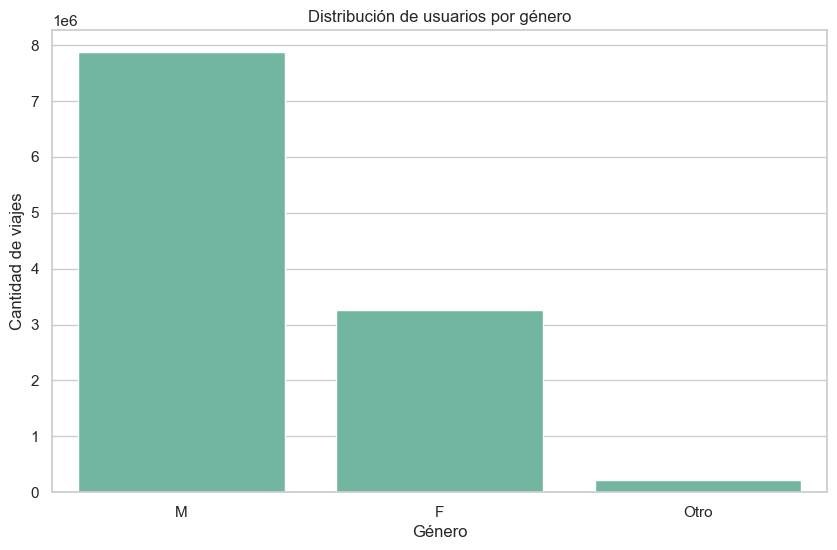

In [12]:
# Perfil de uso por género 
# Conteo y proporción de género
genero_counts = df['Genero_Usuario'].value_counts()
genero_percent = df['Genero_Usuario'].value_counts(normalize=True) * 100

print("Distribución de género:")
print(pd.concat([genero_counts, genero_percent], axis=1).rename(columns={0: "Conteo", 1: "Porcentaje"}))


sns.countplot(data=df, x="Genero_Usuario", order=genero_counts.index)
plt.title("Distribución de usuarios por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de viajes")
plt.show()


Se observa una mayor participación masculina (~69%), seguida por mujeres (~29%) y una categoría menor marcada como “Otro”.

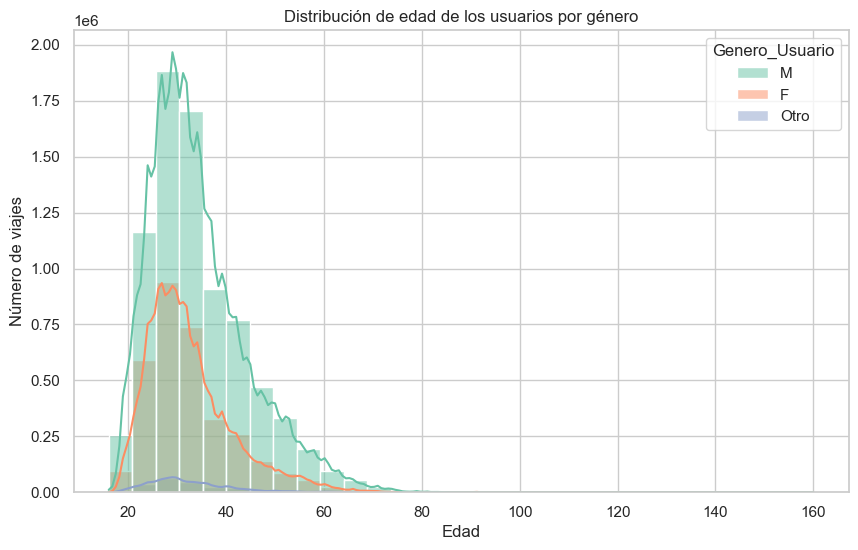

In [13]:
#Distribución de edad
sns.histplot(data=df, x="Edad_Usuario", bins=30, kde=True, hue="Genero_Usuario", palette="Set2")
plt.title("Distribución de edad de los usuarios por género")
plt.xlabel("Edad")
plt.ylabel("Número de viajes")
plt.show()


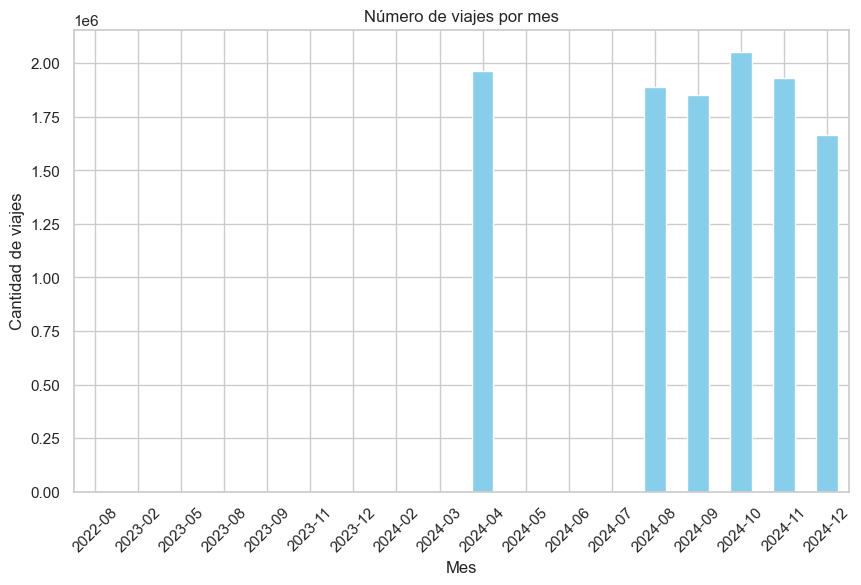

In [14]:
#Número de viajes por mes 
df["Mes"] = df["Fecha_Retiro"].dt.to_period("M")
viajes_por_mes = df["Mes"].value_counts().sort_index()

viajes_por_mes.plot(kind="bar", color="skyblue")
plt.title("Número de viajes por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de viajes")
plt.xticks(rotation=45)
plt.show()


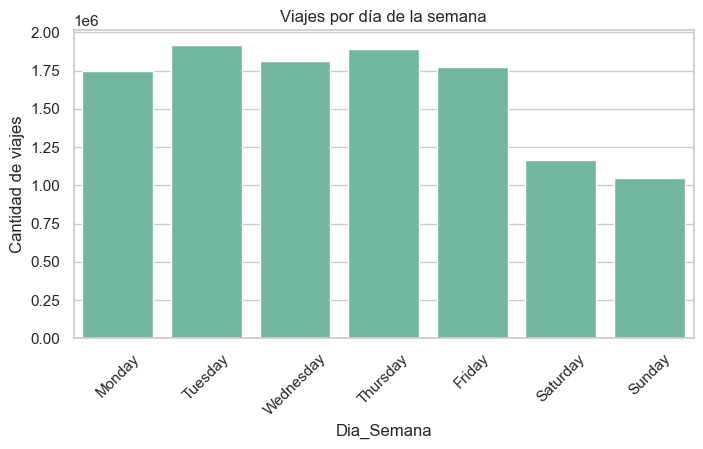

In [15]:
#Viajes por semana 
df['Fecha_Retiro'] = pd.to_datetime(df['Fecha_Retiro'], dayfirst=True, errors='coerce')
df['Dia_Semana'] = df['Fecha_Retiro'].dt.day_name()
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Dia_Semana',
              order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Viajes por día de la semana")
plt.ylabel("Cantidad de viajes")
plt.xticks(rotation=45)
plt.show()


# Análisis de horarios y estaciones

## Viajes por hora

C:\Users\Karla Palma\AppData\Local\Temp\ipykernel_45104\2157838535.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hora', palette='coolwarm')


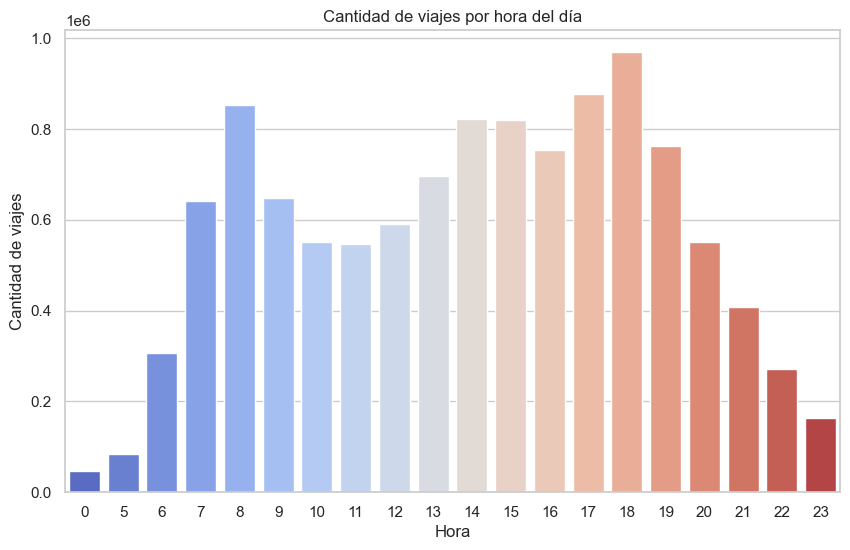

In [16]:
df['Hora'] = pd.to_datetime(df['Hora_Retiro'], format='%H:%M:%S', errors='coerce').dt.hour
sns.countplot(data=df, x='Hora', palette='coolwarm')
plt.title('Cantidad de viajes por hora del d\u00eda')
plt.xlabel('Hora')
plt.ylabel('Cantidad de viajes')
plt.show()

Los picos de uso ocurren entre las 7–10h y 17–20h, coincidiendo con horarios laborales.

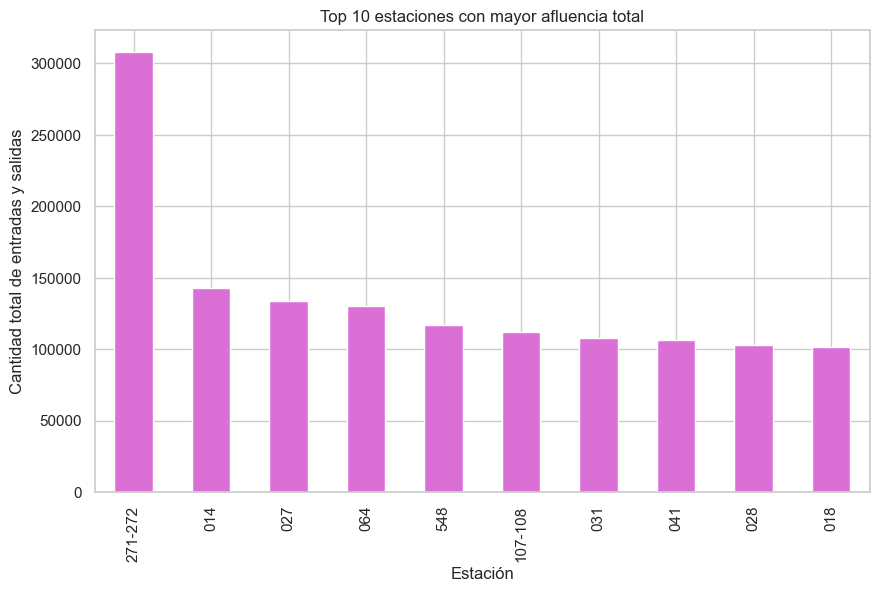

In [17]:
#Estaciones más utilizadas.
estaciones = pd.concat([
    df['Ciclo_Estacion_Retiro'].value_counts(),
    df['Ciclo_EstacionArribo'].value_counts()
], axis=1).sum(axis=1).sort_values(ascending=False)

estaciones.head(10).plot(kind='bar', color='orchid')
plt.title('Top 10 estaciones con mayor afluencia total')
plt.xlabel('Estaci\u00f3n')
plt.ylabel('Cantidad total de entradas y salidas')
plt.show()

# Aprendizaje no supervisado

## Clustering: Perfiles de uso por estación


Segmentación de las estaciones de Ecobici con base en su comportamiento operativo y perfil de usuarios. 


- Identificar estaciones con **alta y baja demanda**.
- Diferenciar estaciones según la **proporción de mujeres** usuarias o la **edad promedio**.
- Detectar **comportamientos atípicos**, útiles para mantenimiento, redistribución de unidades o políticas públicas focalizadas.

---

In [18]:
grupo_estaciones = df.groupby('Ciclo_Estacion_Retiro').agg({
    'Bici': 'count',
    'Genero_Usuario': lambda x: (x == 'F').sum() / len(x),
    'Edad_Usuario': 'mean'
}).rename(columns={'Bici': 'Viajes', 'Genero_Usuario': 'Proporcion_Fem', 'Edad_Usuario': 'Edad_Prom'})

# Clasificación adicional basada en volumen de viajes
grupo_estaciones['Tipo_Zona'] = np.where(grupo_estaciones['Viajes'] > grupo_estaciones['Viajes'].median(), 'Alta', 'Baja')

In [19]:
#Preprocesamiento
categorical_cols = ['Tipo_Zona']
numerical_cols = ['Viajes', 'Proporcion_Fem', 'Edad_Prom']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(grupo_estaciones)

In [20]:
#Clustering con KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_processed)
grupo_estaciones['Cluster_KMeans'] = kmeans_clusters

c:\Users\Karla Palma\anaconda3\envs\ciencia\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


**Interpretación:**
KMeans agrupa las estaciones en 4 grandes perfiles. Algunos clusters presentan alto volumen de viajes, otros tienen mayor proporción de mujeres o usuarios más jóvenes.

---

In [21]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_processed)
grupo_estaciones['Cluster_DBSCAN'] = dbscan_clusters

In [22]:
kmeans_summary = grupo_estaciones.groupby('Cluster_KMeans')[['Viajes', 'Proporcion_Fem', 'Edad_Prom']].mean()
print("Resumen de KMeans:\n", kmeans_summary.round(2))

print("\nConteo por cluster DBSCAN:")
print(grupo_estaciones['Cluster_DBSCAN'].value_counts())

for cluster_id in sorted(grupo_estaciones['Cluster_DBSCAN'].unique()):
    print(f"\nAnálisis del Cluster DBSCAN {cluster_id}:")
    subset = grupo_estaciones[grupo_estaciones['Cluster_DBSCAN'] == cluster_id]
    print(subset[['Viajes', 'Proporcion_Fem', 'Edad_Prom']].mean().round(2))

Resumen de KMeans:
                   Viajes  Proporcion_Fem  Edad_Prom
Cluster_KMeans                                     
0               20593.94            0.29      33.97
1                9044.68            0.28      34.30
2               43245.53            0.29      33.26
3                9961.96            0.29      32.24

Conteo por cluster DBSCAN:
Cluster_DBSCAN
 0    674
-1      5
Name: count, dtype: int64

Análisis del Cluster DBSCAN -1:
Viajes            34325.60
Proporcion_Fem        0.34
Edad_Prom            32.28
dtype: float64

Análisis del Cluster DBSCAN 0:
Viajes            16596.43
Proporcion_Fem        0.29
Edad_Prom            33.74
dtype: float64


**Interpretación:**
DBSCAN identificó grupos densos de estaciones similares, pero también clasificó algunas como outliers (cluster -1). Estas estaciones podrían estar mal ubicadas, tener fallos de registro o un patrón de uso muy diferente.

---

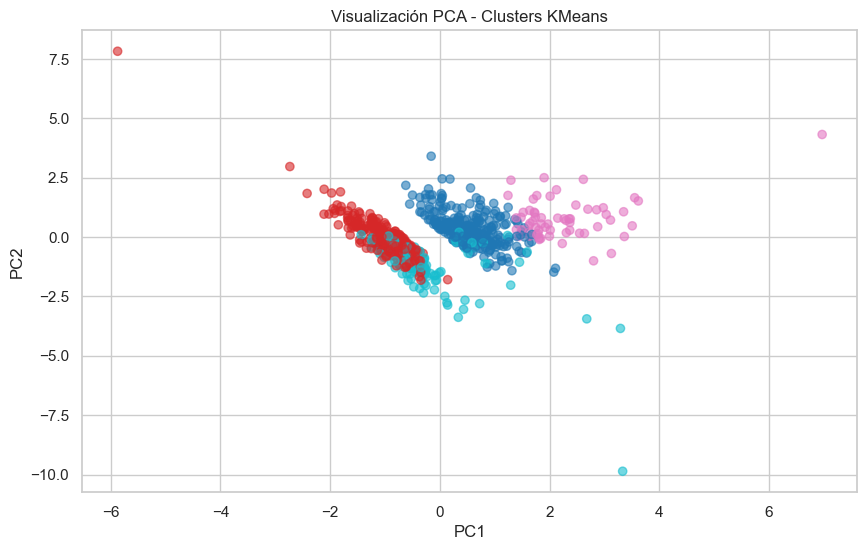

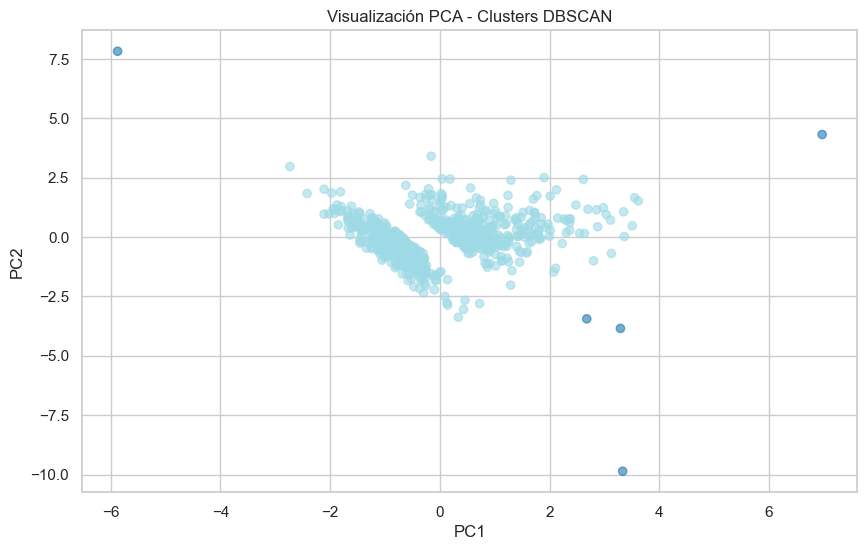

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_processed)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_clusters, cmap='tab10', alpha=0.6)
plt.title("Visualización PCA - Clusters KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=dbscan_clusters, cmap='tab20', alpha=0.6)
plt.title("Visualización PCA - Clusters DBSCAN")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Interpretación de gráficos:**
- KMeans genera clusters uniformes pero forzados.
- DBSCAN revela agrupamientos naturales e identifica estaciones que rompen el patrón.

---

### Conclusiones

- El clustering revela **diversidad de patrones de uso** entre estaciones.
- Los clústeres permiten **segmentar la operación** y tomar decisiones focalizadas.
- DBSCAN fue especialmente útil para detectar estaciones **atípicas** que merecen atención específica.


# Detección de outliers

In [ ]:
#Duración de viaje en minutos
df['Inicio'] = pd.to_datetime(df['Fecha_Retiro'].astype(str) + ' ' + df['Hora_Retiro'], errors='coerce', dayfirst=True)
df['Fin'] = pd.to_datetime(df['Fecha_Arribo'].astype(str) + ' ' + df['Hora_Arribo'], errors='coerce', dayfirst=True)
df['Duracion_min'] = (df['Fin'] - df['Inicio']).dt.total_seconds() / 60

# Filtración de  duraciones positivas
duraciones_validas = df[df['Duracion_min'] > 0]['Duracion_min']


Q1 = duraciones_validas.quantile(0.25)
Q3 = duraciones_validas.quantile(0.75)
IQR = Q3 - Q1
umbral_superior = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f} min")
print(f"Q3: {Q3:.2f} min")
print(f"IQR: {IQR:.2f} min")
print(f"Umbral superior: {umbral_superior:.2f} min")




C:\Users\Karla Palma\AppData\Local\Temp\ipykernel_45104\4146716658.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Inicio'] = pd.to_datetime(df['Fecha_Retiro'].astype(str) + ' ' + df['Hora_Retiro'], errors='coerce', dayfirst=True)


Q1: 31.03 min
Q3: 169927.25 min
IQR: 169896.22 min
Umbral superior: 424771.58 min


Cantidad de viajes outliers: 2


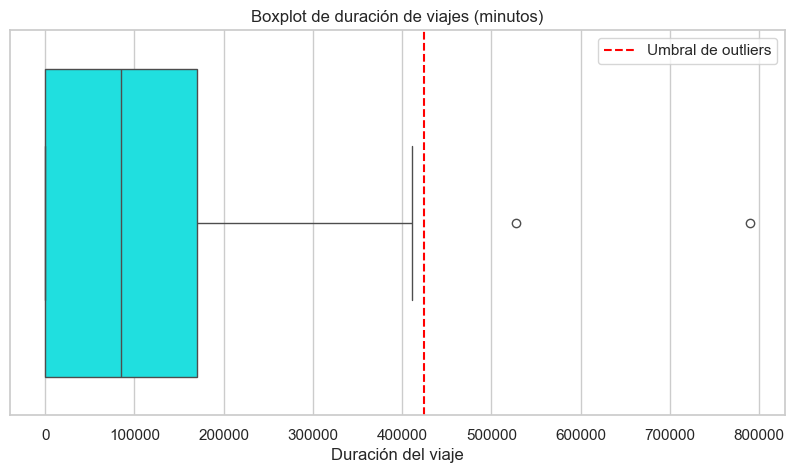

In [27]:
# Detectar outliers
outliers_duracion = df[df['Duracion_min'] > umbral_superior]
print(f"Cantidad de viajes outliers: {len(outliers_duracion):,}")


plt.figure(figsize=(10, 5))
sns.boxplot(x=duraciones_validas, color='cyan')
plt.axvline(umbral_superior, color='red', linestyle='--', label='Umbral de outliers')
plt.title("Boxplot de duración de viajes (minutos)")
plt.xlabel("Duración del viaje")
plt.legend()
plt.show()

# Aprendizaje supervisado

## Análisis Temporal – Regresión Lineal
Detectar si el uso de una estación aumenta o disminuye con el tiempo, para priorizar inversión o diagnóstico.

---

In [ ]:
#Datos mensauales por estación
df['Mes'] = df['Fecha_Retiro'].dt.to_period('M')
viajes_mes = df.groupby(['Ciclo_Estacion_Retiro', 'Mes']).size().unstack(fill_value=0)

In [ ]:
m = {} #pendientes
r2_scores = {}

for estacion in viajes_mes.index:
    y = viajes_mes.loc[estacion].values
    X = np.arange(len(y)).reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    m[estacion] = model.coef_[0]  # Pendiente: tendencia
    r2_scores[estacion] = model.score(X, y)  # R^2: calidad del ajuste

m = pd.Series(m)
r2_scores = pd.Series(r2_scores)

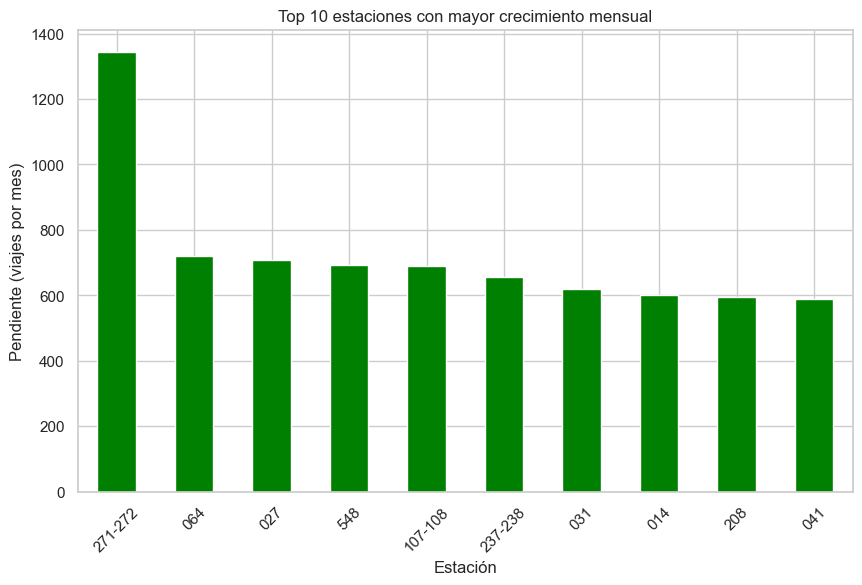

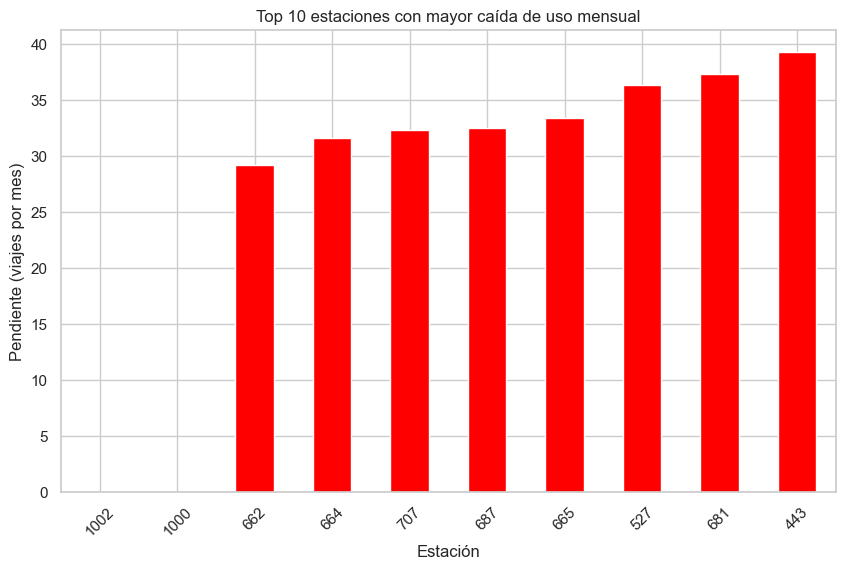

In [ ]:
# Estaciones con mayor crecimiento
m.sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title('Top 10 estaciones con mayor crecimiento mensual')
plt.ylabel('Pendiente (viajes por mes)')
plt.xlabel('Estación')
plt.xticks(rotation=45)
plt.show()

# Estaciones con mayor caída
m.sort_values().head(10).plot(kind='bar', color='red')
plt.title('Top 10 estaciones con mayor caída de uso mensual')
plt.ylabel('Pendiente (viajes por mes)')
plt.xlabel('Estación')
plt.xticks(rotation=45)
plt.show()

###  Interpretación

- Las **pendientes positivas** indican estaciones en crecimiento: podrían estar en zonas en expansión residencial, nuevas rutas de transporte o campañas de promoción.
- Las **pendientes negativas** indican un descenso en el uso: posibles fallas técnicas, inseguridad, o menor conectividad.
- El coeficiente **R²** nos indica si la tendencia es confiable; valores cercanos a 1 significan un buen ajuste lineal.

> Esta regresión busca **identificar la tendencia histórica** de uso mensual por estación.


